# Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset.
a. Perform Data Pre-processing

b. Define Model and perform training

c. Evaluate Results using confusion matrix.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images (scale pixel values to 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to add channel dimension (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train_categorical = tf.keras.utils.to_categorical(y_train, 10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# ---

### 🔹 1. **Why divide by `255.0`?**
MNIST images have pixel values in the range **0 to 255** (since they’re grayscale).

👉 To **normalize** the data, we divide by 255.0 so all pixel values fall between **0.0 and 1.0**.

#### ✅ Why is normalization important?
- It helps the model **train faster** and more **accurately**.
- Neural networks work best when inputs are **scaled**, especially in deep learning.

---

### 🔹 2. **Why reshape using `.reshape(-1, 28, 28, 1)`?**

The original `x_train` shape is `(60000, 28, 28)` → meaning 60,000 grayscale images of size 28x28.

But **CNNs in Keras expect 4D input** in this format:

```
(batch_size, height, width, channels)
```

So we do:
```python
x_train.reshape(-1, 28, 28, 1)
```

#### ✅ Meaning:
- `-1` means: *"infer the batch size automatically"* (in our case, 60,000 for training, 10,000 for testing).
- `28, 28`: height and width of the image.
- `1`: since it's grayscale, there’s **1 color channel**.

If it were a color image (RGB), it would be `(28, 28, 3)`.

---

### 🔹 3. **Why convert labels like `3` to `[0 0 0 1 0 0 0 0 0 0]`?**

This is called **One-Hot Encoding**.

Original labels are just numbers:
```python
y_train = [5, 0, 4, 1, 9, ...]
```

But when using **categorical_crossentropy loss**, the model needs target labels in a **vector format**.

#### ✅ Example:
- Label `3` → One-hot → `[0 0 0 1 0 0 0 0 0 0]`
- Label `7` → One-hot → `[0 0 0 0 0 0 0 1 0 0]`

Each label becomes a **vector of length 10** (for digits 0–9), with `1` at the correct index.

This helps the model calculate the probability for each class and train accordingly.

---

### Summary Table:

| Step                         | Why It's Done                                                                 |
|------------------------------|-------------------------------------------------------------------------------|
| `x / 255.0`                  | Normalize pixel values (0–1) → faster and stable training                     |
| `.reshape(-1, 28, 28, 1)`    | Add channel dimension → CNNs expect 4D input: `(batch, height, width, channel)` |
| One-Hot Encoding of labels   | Required for `categorical_crossentropy` loss (multi-class classification)     |

---

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---

#### ✅ `models.Sequential([...])`

- We are using the **Sequential API** from Keras, which lets us build a model **layer-by-layer**.
- This is perfect for simple linear stacks of layers like CNNs.

---

#### ✅ `layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))`

- `Conv2D` is the **convolution layer**. It learns **filters** (or kernels) that detect patterns like edges, corners, curves, etc.
- `32`: Number of filters → This means the layer will output 32 feature maps.
- `(3,3)`: Filter size → Each filter is 3x3 in size.
- `activation='relu'`: Applies the **ReLU activation** function → sets all negative values to 0, helping with non-linearity and faster training.
- `input_shape=(28,28,1)`: Required only in the **first layer**. It defines the shape of each input image.

---

#### ✅ `layers.MaxPooling2D((2,2))`

- **MaxPooling** downsamples the feature maps to reduce **spatial size** (width/height) and **computation**.
- `(2,2)` means it picks the **maximum value from each 2x2 block**, effectively halving the width and height.
- This also helps the model focus on the most **important features**.

---

#### ✅ `layers.Conv2D(64, (3,3), activation='relu')`

- A second convolution layer, this time with **64 filters** of size 3x3.
- It learns even more complex features (e.g. digit shapes, curves, loops).
- `ReLU` again for non-linearity.

---

#### ✅ `layers.MaxPooling2D((2,2))`

- Another downsampling step using 2x2 blocks.
- Further reduces spatial dimensions and overfitting.

---

#### ✅ `layers.Flatten()`

- Converts the **2D feature maps** into a **1D vector** to feed into fully connected (`Dense`) layers.
- Think of it like unrolling all pixels into a single long vector.

---

#### ✅ `layers.Dense(64, activation='relu')`

- A **fully connected layer** with 64 neurons.
- It acts like a decision-making part of the network.
- ReLU is again used for non-linearity.

---

#### ✅ `layers.Dense(10, activation='softmax')`

- **Output layer**: 10 neurons → because we have **10 classes (digits 0 to 9)**.
- `softmax` gives a **probability distribution** over all 10 classes → sum of all outputs = 1.
- The neuron with the highest value is the predicted class.

---

### 🔍 Visualization of Layer Flow:
```
Input Image → Conv2D → MaxPool → Conv2D → MaxPool → Flatten → Dense → Output
   (28x28)     32x26x26   32x13x13    64x11x11    64x5x5     1600      64        10
```

---

### Summary Table:

| Layer                 | Purpose                                                   |
|----------------------|-----------------------------------------------------------|
| Conv2D               | Detect features like edges, shapes                        |
| MaxPooling2D         | Reduce image size and focus on important features         |
| Flatten              | Prepare for fully connected layers                        |
| Dense (hidden)       | Learn patterns and relationships between features         |
| Dense (output)       | Softmax → returns probabilities for 10 classes            |

---

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train_categorical, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.8675 - loss: 0.4332 - val_accuracy: 0.9817 - val_loss: 0.0641
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9810 - loss: 0.0593 - val_accuracy: 0.9855 - val_loss: 0.0517
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9869 - loss: 0.0426 - val_accuracy: 0.9888 - val_loss: 0.0391
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9912 - loss: 0.0283 - val_accuracy: 0.9908 - val_loss: 0.0344
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9925 - loss: 0.0234 - val_accuracy: 0.9910 - val_loss: 0.0357


Conv2D: 32 filters of size 3x3, ReLU activation.

MaxPooling2D: downsample to reduce spatial size.

Two conv + pool layers extract features.

Flatten: converts 2D feature maps to 1D.

Dense: fully connected layers.

Final Dense(10) with softmax gives probabilities for 10 classes.

In [5]:
score = model.evaluate(x_train, y_train_categorical, verbose=0)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

Test loss: 1.606241799890995
Test accuracy: 99.51333403587341


In [6]:
# Predict test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


predict returns probabilities.

argmax picks the class with highest probability.

confusion_matrix compares predictions vs true labels.

ConfusionMatrixDisplay visualizes it nicely.

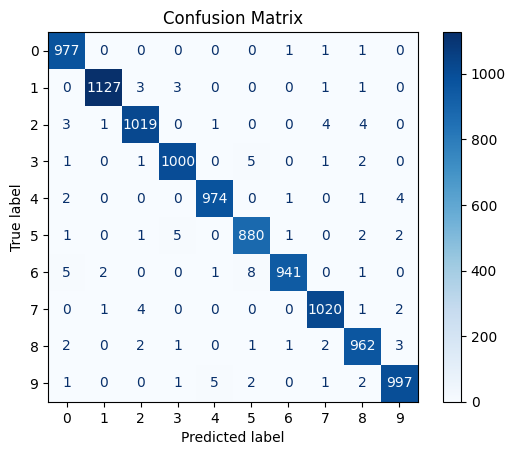

In [8]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()